## Deep Learning1 - ch.6

### Compare optimizer with MNIST data

In [1]:
# needed library

import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from dataset.mnist import load_mnist     # same datasets as book
sys.path.append(os.pardir)
from collections import OrderedDict
import import_ipynb
from layers_collection import *
from Neural_Network import neural_network
from optimizer import *

C:\ana3\envs\t_f2.2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


importing Jupyter notebook from layers_collection.ipynb
importing Jupyter notebook from optimizer.ipynb
importing Jupyter notebook from Neural_Network.ipynb


#### opitmizers

In [25]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize = True)

batch_size = 128
max_iter = 2000

'''
# learning rate: 0.1
optimizers = {
    'SGD' : sgd(lr=0.1),
    'momentum' : momentum(lr=0.1),
    'adagrad' : adagrad(lr=0.1),
    'adam' : adam(lr=0.1)
}
''' 
#learning reate: 0.01
optimizers = {
    'SGD' : sgd(),
    'momentum' : momentum(),
    'adagrad' : adagrad(),
    'adam' : adam()
}

each_neural_network = {}
each_train_loss = {}

for key in optimizers.keys():
    each_neural_network[key] = neural_network(input_size=28*28, hidden_size=[100,100,100,100,100], output_size=10,
                                              activation = 'relu', weight_init_std = 'relu', weight_decay_lambda=0)
    each_train_loss[key] = []

for i in range(max_iter):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    for key in optimizers.keys():
        grads = each_neural_network[key].gradient(x_batch, y_batch)
        optimizers[key].update(each_neural_network[key].params, grads)

        loss = each_neural_network[key].loss(x_batch, y_batch)
        each_train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = each_neural_network[key].loss(x_batch, y_batch)
            print(key + ":" + str(loss))

<string>:59: RuntimeWarning: divide by zero encountered in log


===========iteration:0===========
SGD:2.217598020644401
momentum:2.165926433442298
adagrad:inf
adam:inf
===========iteration:100===========
SGD:0.24659090157915367
momentum:0.2965482360593935
adagrad:0.24986376968087431
adam:2.2994933354637226
===========iteration:200===========
SGD:0.16741219811495037
momentum:0.39707796698564046
adagrad:0.29832473124735337
adam:2.312230980836386
===========iteration:300===========
SGD:0.2158307607476894
momentum:0.30554227659645367
adagrad:0.2802485407772219
adam:2.29795196298522
===========iteration:400===========
SGD:0.2082270697082611
momentum:0.3762171040575127
adagrad:0.25842444529233005
adam:2.3280049492451216
===========iteration:500===========
SGD:0.03368732354086977
momentum:0.11680837591285786
adagrad:0.07496011586357985
adam:2.3021758798103344
===========iteration:600===========
SGD:0.04540191296467957
momentum:0.15485721261297108
adagrad:0.12544148010702313
adam:2.3150861323021275
===========iteration:700===========
SGD:0.0503466853140899

In [11]:
def smooth_curve(x):

    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


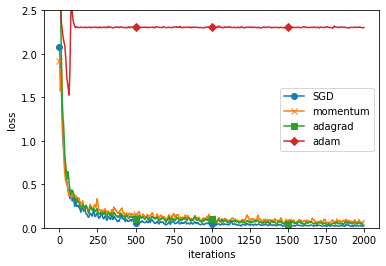

In [27]:
markers = {"SGD": "o", "momentum": "x", "adagrad": "s", "adam": "D"}
x = np.arange(max_iter)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(each_train_loss[key]), marker=markers[key],
        markevery=500, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


### Compare weight initialization methods with MNIST data

In [23]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize = True)

batch_size = 128
max_iter = 2000

optimizer = sgd(lr=0.01)

weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}

each_neural_network = {}
each_train_loss = {}

for key, value in weight_init_types.items():
    each_neural_network[key] = neural_network(input_size=28*28, hidden_size=[100,100,100,100,100], output_size=10,
                                              activation = 'relu', weight_init_std = value, weight_decay_lambda=0)
    each_train_loss[key] = []

for i in range(max_iter):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    for key in weight_init_types.keys():
        grads = each_neural_network[key].gradient(x_batch, y_batch)
        optimizer.update(each_neural_network[key].params, grads)

        loss = each_neural_network[key].loss(x_batch, y_batch)
        each_train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = each_neural_network[key].loss(x_batch, y_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.302497125891029
Xavier:2.3050309437784997
He:2.5013009984091057
===========iteration:100===========
std=0.01:2.302316213761485
Xavier:2.274378343182759
He:1.6343591404523916
===========iteration:200===========
std=0.01:2.302477915086877
Xavier:2.2404329913798615
He:0.7886218753459269
===========iteration:300===========
std=0.01:2.302860991725959
Xavier:2.1304560042225775
He:0.5698713099721606
===========iteration:400===========
std=0.01:2.2999040426356627
Xavier:1.9061021034153747
He:0.38917080031165385
===========iteration:500===========
std=0.01:2.304488393302383
Xavier:1.3944243645990337
He:0.2987980386067842
===========iteration:600===========
std=0.01:2.3028776032485
Xavier:0.8337241676358909
He:0.26897552658117463
===========iteration:700===========
std=0.01:2.302316724101747
Xavier:0.6947476790437805
He:0.33380198222064206
===========iteration:800===========
std=0.01:2.3029105443262745
Xavier:0.5629359575498167
He:0.2299220168528825
=

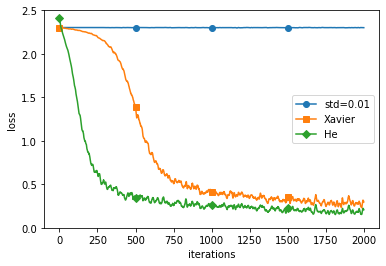

In [24]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iter)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(each_train_loss[key]), marker=markers[key], markevery=500, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### Batch Normalization 

In [30]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize = True)
x_train = x_train[:1000]
y_trian = y_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def train_network(weight_init_std):
    bn_network = neural_network(input_size=28*28,
                                hidden_size = [100,100,100,100,100],
                                output_size = 10,
                                weight_init_std = weight_init_std,
                                batchnorm =True)
    simple_network = neural_network(input_size=28*28,
                                    hidden_size=[100,100,100,100,100],
                                    output_size = 10,
                                    weight_init_std = weight_init_std)

    optimizer = sgd(lr= learning_rate)
    
    simple_accuracy = []
    bn_accuracy = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_ = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        y_batch = y_trian[batch_mask]

        for _network in (bn_network, simple_network):
            grads = _network.gradient(x_batch, y_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = simple_network.accuracy(x_train, y_trian)
            bn_train_acc = bn_network.accuracy(x_train, y_trian)
            simple_accuracy.append(train_acc)
            bn_accuracy.append(bn_train_acc)

            print("epoch:" + str(epoch_) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_ += 1
            if epoch_ >= max_epochs:
                break

    return simple_accuracy, bn_accuracy


============== 1/16 ==============
epoch:0 | 0.097 - 0.092
epoch:1 | 0.097 - 0.125

<string>:59: RuntimeWarning: divide by zero encountered in log
<string>:86: RuntimeWarning: overflow encountered in square
<string>:86: RuntimeWarning: invalid value encountered in double_scalars
<string>:37: RuntimeWarning: invalid value encountered in subtract



epoch:2 | 0.097 - 0.174
epoch:3 | 0.097 - 0.202
epoch:4 | 0.097 - 0.219
epoch:5 | 0.097 - 0.231
epoch:6 | 0.097 - 0.241
epoch:7 | 0.097 - 0.261
epoch:8 | 0.097 - 0.283
epoch:9 | 0.097 - 0.303
epoch:10 | 0.097 - 0.322
epoch:11 | 0.097 - 0.351
epoch:12 | 0.097 - 0.371
epoch:13 | 0.097 - 0.394
epoch:14 | 0.097 - 0.406
epoch:15 | 0.097 - 0.423
epoch:16 | 0.097 - 0.435
epoch:17 | 0.097 - 0.439
epoch:18 | 0.097 - 0.463
epoch:19 | 0.097 - 0.48


No handles with labels found to put in legend.
<string>:59: RuntimeWarning: divide by zero encountered in log
<string>:86: RuntimeWarning: overflow encountered in square


============== 2/16 ==============
epoch:0 | 0.094 - 0.089


<string>:86: RuntimeWarning: invalid value encountered in double_scalars
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.124
epoch:2 | 0.097 - 0.16
epoch:3 | 0.097 - 0.176
epoch:4 | 0.097 - 0.198
epoch:5 | 0.097 - 0.219
epoch:6 | 0.097 - 0.248
epoch:7 | 0.097 - 0.28
epoch:8 | 0.097 - 0.293
epoch:9 | 0.097 - 0.317
epoch:10 | 0.097 - 0.34
epoch:11 | 0.097 - 0.366
epoch:12 | 0.097 - 0.374
epoch:13 | 0.097 - 0.391
epoch:14 | 0.097 - 0.419
epoch:15 | 0.097 - 0.417
epoch:16 | 0.097 - 0.429
epoch:17 | 0.097 - 0.446
epoch:18 | 0.097 - 0.468


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.479
============== 3/16 ==============
epoch:0 | 0.142 - 0.117
epoch:1 | 0.451 - 0.123
epoch:2 | 0.558 - 0.146
epoch:3 | 0.666 - 0.203
epoch:4 | 0.745 - 0.238
epoch:5 | 0.78 - 0.281
epoch:6 | 0.829 - 0.317
epoch:7 | 0.857 - 0.332
epoch:8 | 0.891 - 0.377
epoch:9 | 0.915 - 0.412
epoch:10 | 0.923 - 0.438
epoch:11 | 0.952 - 0.471
epoch:12 | 0.959 - 0.494
epoch:13 | 0.969 - 0.523
epoch:14 | 0.978 - 0.544
epoch:15 | 0.98 - 0.572
epoch:16 | 0.986 - 0.591
epoch:17 | 0.991 - 0.599
epoch:18 | 0.994 - 0.622


No handles with labels found to put in legend.


epoch:19 | 0.995 - 0.641
============== 4/16 ==============
epoch:0 | 0.098 - 0.089
epoch:1 | 0.264 - 0.132
epoch:2 | 0.4 - 0.191
epoch:3 | 0.501 - 0.279
epoch:4 | 0.56 - 0.358
epoch:5 | 0.62 - 0.433
epoch:6 | 0.663 - 0.504
epoch:7 | 0.691 - 0.55
epoch:8 | 0.719 - 0.582
epoch:9 | 0.749 - 0.627
epoch:10 | 0.782 - 0.657
epoch:11 | 0.794 - 0.691
epoch:12 | 0.823 - 0.706
epoch:13 | 0.819 - 0.721
epoch:14 | 0.827 - 0.737
epoch:15 | 0.838 - 0.743
epoch:16 | 0.855 - 0.761
epoch:17 | 0.862 - 0.77
epoch:18 | 0.863 - 0.778


No handles with labels found to put in legend.


epoch:19 | 0.872 - 0.787
============== 5/16 ==============
epoch:0 | 0.107 - 0.091
epoch:1 | 0.111 - 0.157
epoch:2 | 0.112 - 0.311
epoch:3 | 0.115 - 0.438
epoch:4 | 0.114 - 0.527
epoch:5 | 0.114 - 0.574
epoch:6 | 0.116 - 0.629
epoch:7 | 0.117 - 0.671
epoch:8 | 0.117 - 0.702
epoch:9 | 0.119 - 0.734
epoch:10 | 0.123 - 0.775
epoch:11 | 0.126 - 0.793
epoch:12 | 0.14 - 0.806
epoch:13 | 0.146 - 0.829
epoch:14 | 0.153 - 0.831
epoch:15 | 0.159 - 0.845
epoch:16 | 0.161 - 0.858
epoch:17 | 0.166 - 0.87
epoch:18 | 0.17 - 0.874


No handles with labels found to put in legend.


epoch:19 | 0.182 - 0.886
============== 6/16 ==============
epoch:0 | 0.049 - 0.084
epoch:1 | 0.098 - 0.162
epoch:2 | 0.119 - 0.413
epoch:3 | 0.123 - 0.6
epoch:4 | 0.146 - 0.647
epoch:5 | 0.117 - 0.697
epoch:6 | 0.126 - 0.743
epoch:7 | 0.125 - 0.775
epoch:8 | 0.13 - 0.801
epoch:9 | 0.117 - 0.828
epoch:10 | 0.117 - 0.851
epoch:11 | 0.117 - 0.865
epoch:12 | 0.171 - 0.881
epoch:13 | 0.17 - 0.893
epoch:14 | 0.117 - 0.9
epoch:15 | 0.117 - 0.91
epoch:16 | 0.142 - 0.912
epoch:17 | 0.119 - 0.93
epoch:18 | 0.176 - 0.932


No handles with labels found to put in legend.


epoch:19 | 0.144 - 0.946
============== 7/16 ==============
epoch:0 | 0.093 - 0.075
epoch:1 | 0.116 - 0.373
epoch:2 | 0.117 - 0.615
epoch:3 | 0.117 - 0.699
epoch:4 | 0.162 - 0.762
epoch:5 | 0.117 - 0.806
epoch:6 | 0.117 - 0.828
epoch:7 | 0.117 - 0.858
epoch:8 | 0.117 - 0.872
epoch:9 | 0.117 - 0.9
epoch:10 | 0.117 - 0.925
epoch:11 | 0.117 - 0.942
epoch:12 | 0.117 - 0.948
epoch:13 | 0.117 - 0.964
epoch:14 | 0.117 - 0.968
epoch:15 | 0.117 - 0.976
epoch:16 | 0.117 - 0.98
epoch:17 | 0.116 - 0.985
epoch:18 | 0.117 - 0.987


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.991
============== 8/16 ==============
epoch:0 | 0.117 - 0.104
epoch:1 | 0.117 - 0.36
epoch:2 | 0.117 - 0.687
epoch:3 | 0.117 - 0.756
epoch:4 | 0.117 - 0.812
epoch:5 | 0.117 - 0.859
epoch:6 | 0.117 - 0.915
epoch:7 | 0.116 - 0.949
epoch:8 | 0.116 - 0.958
epoch:9 | 0.116 - 0.97
epoch:10 | 0.116 - 0.981
epoch:11 | 0.116 - 0.99
epoch:12 | 0.116 - 0.99
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.093 - 0.167
epoch:1 | 0.099 - 0.556
epoch:2 | 0.117 - 0.75
epoch:3 | 0.117 - 0.837
epoch:4 | 0.117 - 0.903
epoch:5 | 0.117 - 0.948
epoch:6 | 0.117 - 0.972
epoch:7 | 0.117 - 0.974
epoch:8 | 0.117 - 0.989
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.159
epoch:1 | 0.105 - 0.575
epoch:2 | 0.105 - 0.772
epoch:3 | 0.117 - 0.895
epoch:4 | 0.105 - 0.918
epoch:5 | 0.105 - 0.934
epoch:6 | 0.117 - 0.968
epoch:7 | 0.117 - 0.961
epoch:8 | 0.117 - 0.977
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.96
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.966
============== 11/16 ==============
epoch:0 | 0.097 - 0.224
epoch:1 | 0.116 - 0.454
epoch:2 | 0.116 - 0.711
epoch:3 | 0.116 - 0.687
epoch:4 | 0.116 - 0.744
epoch:5 | 0.116 - 0.776
epoch:6 | 0.116 - 0.803
epoch:7 | 0.116 - 0.803
epoch:8 | 0.116 - 0.793
epoch:9 | 0.116 - 0.825
epoch:10 | 0.117 - 0.875
epoch:11 | 0.117 - 0.89
epoch:12 | 0.117 - 0.889
epoch:13 | 0.117 - 0.89
epoch:14 | 0.116 - 0.89
epoch:15 | 0.116 - 0.891
epoch:16 | 0.116 - 0.886
epoch:17 | 0.116 - 0.891


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.877
epoch:19 | 0.116 - 0.89
============== 12/16 ==============
epoch:0 | 0.116 - 0.191
epoch:1 | 0.116 - 0.448
epoch:2 | 0.116 - 0.598
epoch:3 | 0.116 - 0.788
epoch:4 | 0.116 - 0.819
epoch:5 | 0.116 - 0.848
epoch:6 | 0.117 - 0.867
epoch:7 | 0.117 - 0.861
epoch:8 | 0.117 - 0.884
epoch:9 | 0.117 - 0.894
epoch:10 | 0.117 - 0.887
epoch:11 | 0.117 - 0.845
epoch:12 | 0.117 - 0.895
epoch:13 | 0.117 - 0.901
epoch:14 | 0.117 - 0.9
epoch:15 | 0.117 - 0.899
epoch:16 | 0.117 - 0.902
epoch:17 | 0.117 - 0.974


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.986
epoch:19 | 0.117 - 0.972
============== 13/16 ==============
epoch:0 | 0.116 - 0.225
epoch:1 | 0.116 - 0.452
epoch:2 | 0.116 - 0.554
epoch:3 | 0.116 - 0.482
epoch:4 | 0.117 - 0.531
epoch:5 | 0.117 - 0.565
epoch:6 | 0.117 - 0.609
epoch:7 | 0.117 - 0.617
epoch:8 | 0.117 - 0.678
epoch:9 | 0.117 - 0.694
epoch:10 | 0.117 - 0.561
epoch:11 | 0.117 - 0.659
epoch:12 | 0.117 - 0.695
epoch:13 | 0.116 - 0.695
epoch:14 | 0.117 - 0.694
epoch:15 | 0.117 - 0.706
epoch:16 | 0.116 - 0.707
epoch:17 | 0.116 - 0.706
epoch:18 | 0.116 - 0.706


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.708
============== 14/16 ==============
epoch:0 | 0.116 - 0.12
epoch:1 | 0.105 - 0.418
epoch:2 | 0.117 - 0.472
epoch:3 | 0.117 - 0.459
epoch:4 | 0.117 - 0.508
epoch:5 | 0.117 - 0.516
epoch:6 | 0.117 - 0.599
epoch:7 | 0.117 - 0.589
epoch:8 | 0.117 - 0.489
epoch:9 | 0.117 - 0.586
epoch:10 | 0.117 - 0.601
epoch:11 | 0.117 - 0.615
epoch:12 | 0.117 - 0.611
epoch:13 | 0.117 - 0.599
epoch:14 | 0.117 - 0.605
epoch:15 | 0.117 - 0.591
epoch:16 | 0.117 - 0.607
epoch:17 | 0.117 - 0.613
epoch:18 | 0.117 - 0.622


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.622
============== 15/16 ==============
epoch:0 | 0.116 - 0.096
epoch:1 | 0.116 - 0.366
epoch:2 | 0.117 - 0.467
epoch:3 | 0.117 - 0.433
epoch:4 | 0.117 - 0.495
epoch:5 | 0.117 - 0.506
epoch:6 | 0.117 - 0.507
epoch:7 | 0.117 - 0.502
epoch:8 | 0.117 - 0.507
epoch:9 | 0.117 - 0.512
epoch:10 | 0.117 - 0.575
epoch:11 | 0.117 - 0.575
epoch:12 | 0.117 - 0.555
epoch:13 | 0.117 - 0.592
epoch:14 | 0.117 - 0.517
epoch:15 | 0.117 - 0.601
epoch:16 | 0.117 - 0.588
epoch:17 | 0.117 - 0.606
epoch:18 | 0.117 - 0.611


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.609
============== 16/16 ==============
epoch:0 | 0.116 - 0.152
epoch:1 | 0.116 - 0.238
epoch:2 | 0.116 - 0.375
epoch:3 | 0.117 - 0.386
epoch:4 | 0.116 - 0.41
epoch:5 | 0.117 - 0.401
epoch:6 | 0.117 - 0.411
epoch:7 | 0.117 - 0.416
epoch:8 | 0.117 - 0.417
epoch:9 | 0.117 - 0.412
epoch:10 | 0.117 - 0.461
epoch:11 | 0.117 - 0.466
epoch:12 | 0.117 - 0.491
epoch:13 | 0.117 - 0.416
epoch:14 | 0.117 - 0.422
epoch:15 | 0.117 - 0.511
epoch:16 | 0.116 - 0.518
epoch:17 | 0.116 - 0.517
epoch:18 | 0.116 - 0.515
epoch:19 | 0.116 - 0.52


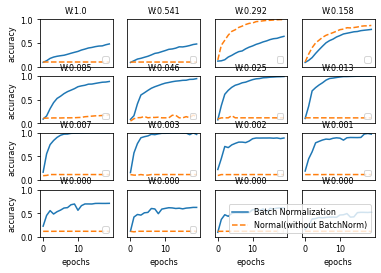

In [42]:
weight_init_candidates = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.rc('font',size=8)
plt.rc('axes',titlesize=8)
plt.rc('axes',labelsize=8)
plt.rc('legend',fontsize=8)
plt.rc('xtick',labelsize=8)
plt.rc('xtick',labelsize=8)

for i, w in enumerate(weight_init_candidates):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = train_network(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w)[:5])
    if i == 15:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

### Overfitting - weight decay

epoch: 0   weight_decay_applied ->, train acc:0.12, test acc:0.1008
naive network-> train acc:0.16333333333333333, test acc:0.1292
epoch: 1   weight_decay_applied ->, train acc:0.12, test acc:0.099
naive network-> train acc:0.19, test acc:0.145
epoch: 2   weight_decay_applied ->, train acc:0.13, test acc:0.0995
naive network-> train acc:0.23, test acc:0.1659
epoch: 3   weight_decay_applied ->, train acc:0.15, test acc:0.1055
naive network-> train acc:0.2633333333333333, test acc:0.1878
epoch: 4   weight_decay_applied ->, train acc:0.17, test acc:0.1151
naive network-> train acc:0.26666666666666666, test acc:0.2156
epoch: 5   weight_decay_applied ->, train acc:0.17333333333333334, test acc:0.1194
naive network-> train acc:0.2966666666666667, test acc:0.2356
epoch: 6   weight_decay_applied ->, train acc:0.21666666666666667, test acc:0.1384
naive network-> train acc:0.34, test acc:0.266
epoch: 7   weight_decay_applied ->, train acc:0.23666666666666666, test acc:0.1531
naive network-> trai

epoch: 61   weight_decay_applied ->, train acc:0.7433333333333333, test acc:0.6141
naive network-> train acc:0.96, test acc:0.7486
epoch: 62   weight_decay_applied ->, train acc:0.7566666666666667, test acc:0.6168
naive network-> train acc:0.96, test acc:0.7499
epoch: 63   weight_decay_applied ->, train acc:0.76, test acc:0.6187
naive network-> train acc:0.9633333333333334, test acc:0.7472
epoch: 64   weight_decay_applied ->, train acc:0.7766666666666666, test acc:0.6299
naive network-> train acc:0.97, test acc:0.7498
epoch: 65   weight_decay_applied ->, train acc:0.7733333333333333, test acc:0.6319
naive network-> train acc:0.97, test acc:0.7531
epoch: 66   weight_decay_applied ->, train acc:0.7766666666666666, test acc:0.6407
naive network-> train acc:0.9566666666666667, test acc:0.7518
epoch: 67   weight_decay_applied ->, train acc:0.7733333333333333, test acc:0.6427
naive network-> train acc:0.97, test acc:0.7536
epoch: 68   weight_decay_applied ->, train acc:0.7733333333333333, te

epoch: 124   weight_decay_applied ->, train acc:0.8666666666666667, test acc:0.723
naive network-> train acc:1.0, test acc:0.7663
epoch: 125   weight_decay_applied ->, train acc:0.8633333333333333, test acc:0.7179
naive network-> train acc:1.0, test acc:0.7685
epoch: 126   weight_decay_applied ->, train acc:0.8466666666666667, test acc:0.7045
naive network-> train acc:1.0, test acc:0.7684
epoch: 127   weight_decay_applied ->, train acc:0.86, test acc:0.7036
naive network-> train acc:1.0, test acc:0.7684
epoch: 128   weight_decay_applied ->, train acc:0.8633333333333333, test acc:0.7111
naive network-> train acc:1.0, test acc:0.769
epoch: 129   weight_decay_applied ->, train acc:0.8666666666666667, test acc:0.7153
naive network-> train acc:1.0, test acc:0.7693
epoch: 130   weight_decay_applied ->, train acc:0.8766666666666667, test acc:0.7058
naive network-> train acc:1.0, test acc:0.7685
epoch: 131   weight_decay_applied ->, train acc:0.8733333333333333, test acc:0.7078
naive network->

epoch: 190   weight_decay_applied ->, train acc:0.8933333333333333, test acc:0.7305
naive network-> train acc:1.0, test acc:0.7753
epoch: 191   weight_decay_applied ->, train acc:0.8933333333333333, test acc:0.7395
naive network-> train acc:1.0, test acc:0.7758
epoch: 192   weight_decay_applied ->, train acc:0.8933333333333333, test acc:0.7396
naive network-> train acc:1.0, test acc:0.7755
epoch: 193   weight_decay_applied ->, train acc:0.89, test acc:0.7324
naive network-> train acc:1.0, test acc:0.775
epoch: 194   weight_decay_applied ->, train acc:0.8866666666666667, test acc:0.7248
naive network-> train acc:1.0, test acc:0.776
epoch: 195   weight_decay_applied ->, train acc:0.8866666666666667, test acc:0.7246
naive network-> train acc:1.0, test acc:0.7759
epoch: 196   weight_decay_applied ->, train acc:0.8966666666666666, test acc:0.7216
naive network-> train acc:1.0, test acc:0.7757
epoch: 197   weight_decay_applied ->, train acc:0.8833333333333333, test acc:0.7275
naive network->

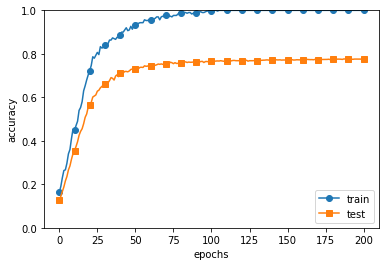

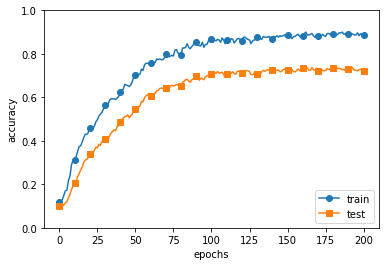

In [119]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)

x_train = x_train[:300]
y_train = y_train[:300]


weight_decay_lambda = 0.1

wieght_decay_network = neural_network(input_size=28*28, 
                                      hidden_size=[100, 100, 100, 100, 100, 100], 
                                      output_size=10,
                                      weight_decay_lambda=weight_decay_lambda)
simple_network = neural_network(input_size=28*28, 
                                      hidden_size=[100, 100, 100, 100, 100, 100], 
                                      output_size=10)

optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_acc_list = []
test_acc_list = []

w_train_acc_list = []
w_test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    for nn in (wieght_decay_network, simple_network):
        grads = nn.gradient(x_batch, y_batch)
        optimizer.update(nn.params, grads)

    if i % iter_per_epoch == 0:
        w_train_acc = wieght_decay_network.accuracy(x_train, y_train)
        w_test_acc = wieght_decay_network.accuracy(x_test, y_test)
        w_train_acc_list.append(w_train_acc)
        w_test_acc_list.append(w_test_acc)
        
        train_acc = simple_network.accuracy(x_train, y_train)
        test_acc = simple_network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch: " + str(epoch_cnt) +'   weight_decay_applied ->' + 
              ", train acc:" + str(w_train_acc) + ", test acc:" + str(w_test_acc)
              +'\n'+ "naive network-> train acc:" + str(train_acc) + ", test acc:" + str(test_acc) )

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)

plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

plt.plot(x, w_train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, w_test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Overfitting - Dropout

epoch: 0   weight_decay_applied ->, train acc:0.1, test acc:0.1037
naive network-> train acc:0.09333333333333334, test acc:0.1034
epoch: 1   weight_decay_applied ->, train acc:0.11333333333333333, test acc:0.1056
naive network-> train acc:0.12666666666666668, test acc:0.1158
epoch: 2   weight_decay_applied ->, train acc:0.11666666666666667, test acc:0.1094
naive network-> train acc:0.14333333333333334, test acc:0.1301
epoch: 3   weight_decay_applied ->, train acc:0.11666666666666667, test acc:0.1119
naive network-> train acc:0.15, test acc:0.1379
epoch: 4   weight_decay_applied ->, train acc:0.12, test acc:0.1116
naive network-> train acc:0.16666666666666666, test acc:0.1512
epoch: 5   weight_decay_applied ->, train acc:0.12, test acc:0.1114
naive network-> train acc:0.19333333333333333, test acc:0.1595
epoch: 6   weight_decay_applied ->, train acc:0.12666666666666668, test acc:0.1152
naive network-> train acc:0.20333333333333334, test acc:0.1666
epoch: 7   weight_decay_applied ->, tra

epoch: 61   weight_decay_applied ->, train acc:0.42, test acc:0.3107
naive network-> train acc:0.8866666666666667, test acc:0.6691
epoch: 62   weight_decay_applied ->, train acc:0.4166666666666667, test acc:0.3126
naive network-> train acc:0.8966666666666666, test acc:0.6718
epoch: 63   weight_decay_applied ->, train acc:0.42, test acc:0.3159
naive network-> train acc:0.8966666666666666, test acc:0.6564
epoch: 64   weight_decay_applied ->, train acc:0.4166666666666667, test acc:0.32
naive network-> train acc:0.8966666666666666, test acc:0.6706
epoch: 65   weight_decay_applied ->, train acc:0.41333333333333333, test acc:0.3172
naive network-> train acc:0.9033333333333333, test acc:0.6763
epoch: 66   weight_decay_applied ->, train acc:0.4166666666666667, test acc:0.3217
naive network-> train acc:0.91, test acc:0.6713
epoch: 67   weight_decay_applied ->, train acc:0.41, test acc:0.3157
naive network-> train acc:0.9166666666666666, test acc:0.6686
epoch: 68   weight_decay_applied ->, train

epoch: 122   weight_decay_applied ->, train acc:0.56, test acc:0.4187
naive network-> train acc:0.99, test acc:0.7309
epoch: 123   weight_decay_applied ->, train acc:0.5733333333333334, test acc:0.4218
naive network-> train acc:0.9933333333333333, test acc:0.7248
epoch: 124   weight_decay_applied ->, train acc:0.57, test acc:0.4242
naive network-> train acc:0.9933333333333333, test acc:0.7278
epoch: 125   weight_decay_applied ->, train acc:0.5633333333333334, test acc:0.4193
naive network-> train acc:0.9966666666666667, test acc:0.7317
epoch: 126   weight_decay_applied ->, train acc:0.5633333333333334, test acc:0.4227
naive network-> train acc:0.9966666666666667, test acc:0.7284
epoch: 127   weight_decay_applied ->, train acc:0.57, test acc:0.4304
naive network-> train acc:0.9933333333333333, test acc:0.7291
epoch: 128   weight_decay_applied ->, train acc:0.5666666666666667, test acc:0.4298
naive network-> train acc:0.9933333333333333, test acc:0.7328
epoch: 129   weight_decay_applied 

epoch: 186   weight_decay_applied ->, train acc:0.74, test acc:0.578
naive network-> train acc:1.0, test acc:0.7387
epoch: 187   weight_decay_applied ->, train acc:0.7466666666666667, test acc:0.5868
naive network-> train acc:1.0, test acc:0.7379
epoch: 188   weight_decay_applied ->, train acc:0.75, test acc:0.5902
naive network-> train acc:1.0, test acc:0.7394
epoch: 189   weight_decay_applied ->, train acc:0.7466666666666667, test acc:0.5909
naive network-> train acc:1.0, test acc:0.74
epoch: 190   weight_decay_applied ->, train acc:0.7466666666666667, test acc:0.5895
naive network-> train acc:1.0, test acc:0.7381
epoch: 191   weight_decay_applied ->, train acc:0.7466666666666667, test acc:0.5908
naive network-> train acc:1.0, test acc:0.7378
epoch: 192   weight_decay_applied ->, train acc:0.7533333333333333, test acc:0.5943
naive network-> train acc:1.0, test acc:0.7391
epoch: 193   weight_decay_applied ->, train acc:0.7466666666666667, test acc:0.5939
naive network-> train acc:1.0,

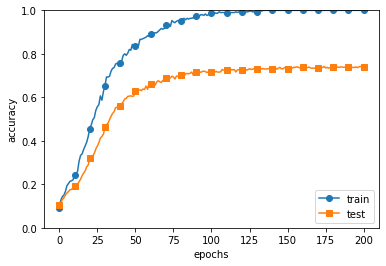

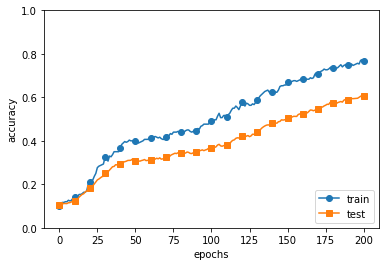

In [12]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)
x_train = x_train[:300]
y_train = y_train[:300]

dropout_ratio = 0.15


dropout_network = neural_network(input_size=28*28, 
                                      hidden_size=[100, 100, 100, 100, 100, 100], 
                                      output_size=10,
                                      dropout = True,
                                      dropout_p = dropout_ratio)
simple_network = neural_network(input_size=28*28, 
                                      hidden_size=[100, 100, 100, 100, 100, 100], 
                                      output_size=10)

optimizer = sgd(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_acc_list = []
test_acc_list = []

d_train_acc_list = []
d_test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    for nn in (dropout_network, simple_network):
        grads = nn.gradient(x_batch, y_batch)
        optimizer.update(nn.params, grads)

    if i % iter_per_epoch == 0:
        d_train_acc = dropout_network.accuracy(x_train, y_train)
        d_test_acc = dropout_network.accuracy(x_test, y_test)
        d_train_acc_list.append(d_train_acc)
        d_test_acc_list.append(d_test_acc)
        
        train_acc = simple_network.accuracy(x_train, y_train)
        test_acc = simple_network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch: " + str(epoch_cnt) +'   weight_decay_applied ->' + 
              ", train acc:" + str(d_train_acc) + ", test acc:" + str(d_test_acc)
              +'\n'+ "naive network-> train acc:" + str(train_acc) + ", test acc:" + str(test_acc) )

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)

plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

plt.plot(x, d_train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, d_test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Hyperparameter optimization

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)

x_train = x_train[:500]
y_train = y_train[:500]

val_rate = 0.2
val_num = int(x_train.shape[0]*val_rate)

permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation,:] if x_train.ndim ==2 else x_train[permutation, :, :, :]
y_train = y_train[permutation]

x_val = x_train[:val_num]
y_val = y_train[:val_num]

x_train = x_train[val_num:]
y_train = y_train[val_num:]

optimization_num_trial = 100 
result_val = {}
result_train = {}

batch_size =100
train_size = x_train.shape[0]
max_epochs=50

In [5]:
for _ in range(optimization_num_trial):
    
    weight_decay = 10 ** np.random.uniform(-8,-4)
    learning_rate = 10 ** np.random.uniform(-6,-2)
    
    network = neural_network(input_size=28*28,
                             hidden_size = [100,100,100,100,100,100],
                             output_size=10,
                             weight_decay_lambda = weight_decay)
    
    optimizer = sgd(lr=learning_rate)
    
    train_acc_list = []
    val_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epochs = 50
    epoch_cnt = 0
    max_iter = int(epochs*iter_per_epoch)
    
    for i in range(max_iter):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        y_batch = y_train[batch_mask]

        grads = network.gradient(x_batch, y_batch)
        optimizer.update(network.params, grads)

        if i % iter_per_epoch == 0:

            train_acc = network.accuracy(x_train, y_train)
            val_acc = network.accuracy(x_val, y_val)
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            
            epoch_cnt += 1
            if epoch_cnt >= max_iter:
                print('\n')
                break
            
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(learning_rate) + ", weight decay:" + str(weight_decay))

    key = "lr:" + str(learning_rate) + ", weight decay:" + str(weight_decay)
    result_val[key] = val_acc_list
    result_train[key] = train_acc_list
        



val acc:0.38 | lr:0.0033913114161568973, weight decay:6.0025965158250195e-06
val acc:0.11 | lr:2.263178395237921e-06, weight decay:2.439624805037282e-05
val acc:0.43 | lr:0.0015727675632035323, weight decay:4.975251301455668e-07
val acc:0.34 | lr:0.0022192394254010516, weight decay:1.3246517503374562e-07
val acc:0.1 | lr:5.25814378933436e-06, weight decay:1.7033459454869813e-07
val acc:0.05 | lr:0.0004718048229559609, weight decay:4.193316319460944e-06
val acc:0.11 | lr:0.0001068569065459731, weight decay:1.904844892233652e-08
val acc:0.06 | lr:3.953243804897508e-05, weight decay:1.3251377022564185e-06
val acc:0.2 | lr:0.0006606354300343381, weight decay:1.285415380376562e-07
val acc:0.67 | lr:0.007835217164380135, weight decay:6.76247193521217e-08
val acc:0.14 | lr:0.00014294351287308304, weight decay:2.1965579541364663e-06
val acc:0.07 | lr:1.409935892459458e-06, weight decay:2.1798283275275678e-08
val acc:0.29 | lr:0.0021334855278148743, weight decay:2.2913782003232577e-06
val acc:0

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.8) | lr:0.009070662998634075, weight decay:1.0458115908497345e-06
Best-2(val acc:0.78) | lr:0.00808074130462405, weight decay:1.4324738830873476e-07
Best-3(val acc:0.77) | lr:0.00833212681986843, weight decay:5.082336219801535e-08
Best-4(val acc:0.77) | lr:0.008000397294608348, weight decay:2.45789820314952e-07
Best-5(val acc:0.71) | lr:0.008145089825354841, weight decay:1.2106947227640387e-07
Best-6(val acc:0.67) | lr:0.007835217164380135, weight decay:6.76247193521217e-08
Best-7(val acc:0.66) | lr:0.00482007975960926, weight decay:1.0205901638249568e-07
Best-8(val acc:0.6) | lr:0.0033534712571795812, weight decay:8.27141717112055e-05
Best-9(val acc:0.55) | lr:0.0037954438510289655, weight decay:1.7287837490609687e-07
Best-10(val acc:0.54) | lr:0.004239089938996643, weight decay:2.931227211713402e-05
Best-11(val acc:0.53) | lr:0.0031324264051240352, weight decay:2.4716785120756205e-06
Best-12(val acc:0.51) | 

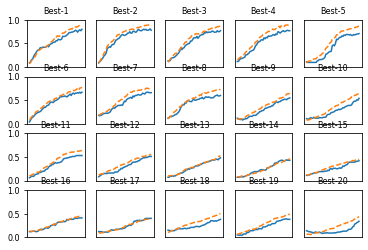

In [8]:
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.rc('font',size=8)
plt.rc('axes',titlesize=8)
plt.rc('axes',labelsize=8)
plt.rc('legend',fontsize=8)
plt.rc('xtick',labelsize=8)
plt.rc('xtick',labelsize=8)
for key, val_acc_list in sorted(result_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, result_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


## Deep Learning1 - Ch.7

### CNN

In [2]:
from collections import OrderedDict

In [2]:
class SimpleConvNet:
    def __init__(self, input_dim=(1,28,28),
                 conv_param={'filter_num':30,
                             'filter_size':5,
                             'pad':0,
                             'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        
    
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad)/filter_stride + 1
        pool_output_size = int(filter_num*(conv_output_size/2)*(conv_output_size/2))

        self.params = {}
        self.params['W1']= weight_init_std*np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2']= weight_init_std*np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2,pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                        self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'],
                                        self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        return self.last_layer.forward(y,t)

    def gradient(self,x,t):
        self.loss(x,t)
        
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        return grads
    
    
    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]
    
    
    def save_params(self, file_name="CNNparams.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="CNNparams.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]


In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

max_epochs = 20


network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()



train loss:2.301298162138348
=== epoch:1, train acc:0.164, test acc:0.199 ===
train loss:2.3001079644622844
train loss:2.2989902651712266
train loss:2.295436262034194
train loss:2.2931976845862767
train loss:2.2907532825342076
train loss:2.2814068724768584
train loss:2.273370261405911
train loss:2.2655328875183396
train loss:2.2569858420137
train loss:2.2408696728166957
train loss:2.2227686032237086
train loss:2.1791179180802716
train loss:2.163335242285674
train loss:2.119484306497101
train loss:2.1119425489162897
train loss:2.054377061890631
train loss:1.9613038996469743
train loss:1.885383489987761
train loss:1.8812117325369038
train loss:1.7468378740775505
train loss:1.7185419963467203
train loss:1.6400714353623942
train loss:1.5155980787193613
train loss:1.5323123843435018
train loss:1.3895772378386133
train loss:1.19171491474267
train loss:1.1967768916618966
train loss:1.2139627019412738
train loss:0.9932565494267139
train loss:1.0813891389615344
train loss:1.0185692072883483
tra

train loss:0.288960778174893
train loss:0.21393493383368573
train loss:0.23569411628050752
train loss:0.3464968327056775
train loss:0.2390268858095065
train loss:0.35172054832792227
train loss:0.15783928520927676
train loss:0.33780025899608096
train loss:0.21899001515312874
train loss:0.19154662948487072
train loss:0.20339323535461595
train loss:0.37188213608995535
train loss:0.22319762931943182
train loss:0.19605525780245425
train loss:0.12288432746374343
train loss:0.18665931218728993
train loss:0.16210459302165897
train loss:0.30154231692895184
train loss:0.2787478605266021
train loss:0.18720437649718974
train loss:0.32764670197551626
train loss:0.2586137847044208
train loss:0.3344355664331774
train loss:0.15419640638652862
train loss:0.33432137278816737
train loss:0.2384650522119723
train loss:0.19174548135660086
train loss:0.2857640589506633
train loss:0.16996330326839348
train loss:0.25522169244039494
train loss:0.1521700213694827
train loss:0.225610439877554
train loss:0.1656410

train loss:0.18656789132927792
train loss:0.0896347062613446
train loss:0.26617591580661076
train loss:0.06875675516075451
train loss:0.14279382620829756
train loss:0.13667027127199213
train loss:0.10769914942949269
train loss:0.07519793791335577
train loss:0.13896595312789212
train loss:0.132148202515896
train loss:0.09490823872445352
train loss:0.08827007975497009
train loss:0.1708729684785347
train loss:0.14522757992191088
train loss:0.11280192059671093
train loss:0.201916306779324
train loss:0.14092579426035967
train loss:0.06346544642441419
train loss:0.11480023673182346
train loss:0.09993770886986306
train loss:0.1000127236252087
train loss:0.14227732869995927
train loss:0.06902861503951267
train loss:0.12079156210794005
train loss:0.06644972695641577
train loss:0.1362929337907755
train loss:0.09301816676804839
train loss:0.07498372824910268
train loss:0.051271294126827724
train loss:0.1337263679297619
train loss:0.06350430024342307
train loss:0.08016818064099228
train loss:0.125

train loss:0.16418404219803623
train loss:0.17023014696816655
train loss:0.03615173436502844
train loss:0.08115046496127806
train loss:0.12722984246594563
train loss:0.07144588198093667
train loss:0.05379323564016075
train loss:0.08168855770305711
train loss:0.06679463936195634
train loss:0.08420073888341817
train loss:0.043142679793297264
train loss:0.15539784696582956
train loss:0.10764316917918075
train loss:0.12184387037463905
train loss:0.14655162946780564
train loss:0.07122735759022723
train loss:0.07624832875808144
train loss:0.05426329410893028
train loss:0.03213460776765789
train loss:0.06340103899041805
train loss:0.06806126913647823
train loss:0.06766733469962034
train loss:0.08714719275279607
train loss:0.05418820718665663
train loss:0.09647835745038201
train loss:0.05469061053898835
train loss:0.08730158967042084
train loss:0.045538719704142985
train loss:0.1656536707231873
train loss:0.03301290783007131
train loss:0.059457010064031444
train loss:0.05129596884252476
train 

train loss:0.0418681038145084
train loss:0.1432283559526938
train loss:0.1333775950366875
train loss:0.04584494931738278
train loss:0.05806162834711062
train loss:0.04033496610473278
train loss:0.09027113046113971
train loss:0.08122063867591339
train loss:0.13535525474853174
train loss:0.04135468401303581
train loss:0.09162148380221141
train loss:0.01669260225103474
train loss:0.07131786994793166
train loss:0.09010719103862011
train loss:0.03309778211816565
train loss:0.03924147645954404
train loss:0.0646031795951922
train loss:0.045361248079835735
train loss:0.033672047016400065
train loss:0.09461022479031868
train loss:0.030540315920572842
train loss:0.04421298900869904
train loss:0.07902862361349061
train loss:0.08452307844523427
train loss:0.07453275414586381
train loss:0.06400778050582653
train loss:0.0495533657594655
train loss:0.03139876069493786
train loss:0.05388333354195329
train loss:0.06883101657299258
train loss:0.0865026982019803
train loss:0.041711280690215055
train loss

train loss:0.09618629937507522
train loss:0.05505913457260749
train loss:0.0648198470794864
train loss:0.08913972407558085
train loss:0.0432766180426965
train loss:0.027116161672033255
train loss:0.03064074491649666
train loss:0.05081800278993361
train loss:0.03495521137115696
train loss:0.07227186641322599
train loss:0.050876138874822396
train loss:0.023182796814305698
train loss:0.0690721773034912
train loss:0.06468102920853731
train loss:0.03249249198444246
train loss:0.08971457597892801
train loss:0.1017254324687136
train loss:0.06886562439950696
train loss:0.02871059699653622
train loss:0.1227100443014608
train loss:0.08884928002512904
train loss:0.03286835615511819
train loss:0.0440586401408224
train loss:0.014054031473293822
train loss:0.047289504642821265
train loss:0.01640663486880603
train loss:0.055152884905081245
train loss:0.0802017447158561
train loss:0.025666687221646046
train loss:0.017777534439203088
train loss:0.04244877808562996
train loss:0.08709117689126261
train l

train loss:0.030879758921534547
train loss:0.03393702867113617
train loss:0.025000029715270516
train loss:0.048916484324024935
train loss:0.06582681995715615
train loss:0.007566644478367705
train loss:0.04041661220393508
train loss:0.06391299409484218
train loss:0.03355883357467009
train loss:0.0025830377129671036
train loss:0.07384688205264674
train loss:0.009980884431919707
train loss:0.016660158455968414
train loss:0.015246131006773527
train loss:0.008869960229227392
train loss:0.011329534279929616
train loss:0.041644665150050234
train loss:0.029476005616518308
train loss:0.026062085169390056
train loss:0.026788833160766377
train loss:0.07190487532153586
train loss:0.09776767363024881
train loss:0.01668106463870767
train loss:0.031266088576036764
train loss:0.007033774477395793
train loss:0.09277755336020163
train loss:0.03999082479629415
train loss:0.11775364903873456
train loss:0.046331624672387405
train loss:0.08153594314019105
train loss:0.01235545606292708
train loss:0.03604292

train loss:0.06285922888244387
train loss:0.013190773419302575
train loss:0.07911062370084378
train loss:0.013242232985895701
train loss:0.032205848011289506
train loss:0.0169773309891902
train loss:0.026492616022441066
train loss:0.0942982408321838
train loss:0.026858204478740388
train loss:0.033290130434004576
train loss:0.013206005573371513
train loss:0.01678248156718247
train loss:0.022344848379999255
train loss:0.1675378197081196
train loss:0.011386017812084339
train loss:0.02512458966433916
train loss:0.05021248394186787
train loss:0.03724553621032287
train loss:0.07480770512831054
train loss:0.00584724070205734
train loss:0.037535085103619234
train loss:0.033525997774992586
train loss:0.022465057552226872
train loss:0.02008873471437165
train loss:0.06829271263190764
train loss:0.02841518558499644
train loss:0.03436797925193538
train loss:0.008324948871012743
train loss:0.015072678965617665
train loss:0.02060502079253085
train loss:0.03227308084903871
train loss:0.053596409313899

train loss:0.011912560144454213
train loss:0.05704482698118197
train loss:0.027905228335023846
train loss:0.02737339693489189
train loss:0.10849175469456666
train loss:0.0905638843136308
train loss:0.045908268028790236
train loss:0.032737737129637866
train loss:0.048213918631201697
train loss:0.014852478717237723
train loss:0.015196878021315714
train loss:0.030360267916122657
train loss:0.026041320697151597
train loss:0.030924443801127494
train loss:0.07412817983253768
train loss:0.0201036322924149
train loss:0.016164451107378543
train loss:0.03960158468952361
train loss:0.016717695322855216
train loss:0.008071331590729149
train loss:0.02265942637009114
train loss:0.040317907849080674
train loss:0.019504343250615244
train loss:0.010220859520098068
train loss:0.01312817212199177
train loss:0.02151911150793999
train loss:0.016742744881932056
train loss:0.032136409325655674
train loss:0.01891537135739908
train loss:0.011964889161775669
train loss:0.01961153264164611
train loss:0.038765641

train loss:0.01977777458040335
train loss:0.024126533032961067
train loss:0.02055015614443123
train loss:0.0032354815815152913
train loss:0.039645991231812845
train loss:0.03018733724866598
train loss:0.05884443591117839
train loss:0.055416366531319164
train loss:0.0052876168392925185
train loss:0.006845905077869478
train loss:0.009555609633133087
train loss:0.015277572060161875
train loss:0.014717685012565453
train loss:0.01240855239987943
train loss:0.018556827961938954
train loss:0.02200363778903553
train loss:0.007003280230216434
train loss:0.06850448331994538
train loss:0.00863356606210717
train loss:0.009447278518643016
train loss:0.1289796787345236
train loss:0.016763027668335925
train loss:0.006891771830494446
train loss:0.015814230601567943
train loss:0.044489272821905235
train loss:0.018921132013924938
train loss:0.012396521479159548
train loss:0.023349462205585602
train loss:0.024357084307664353
train loss:0.005747882590486783
train loss:0.01074782598655739
=== epoch:5, trai

train loss:0.006853887696556046
train loss:0.00912037525891835
train loss:0.013406521793242641
train loss:0.006755193823201737
train loss:0.03816857657535632
train loss:0.006771275479631283
train loss:0.042078081257673
train loss:0.010481869480335056
train loss:0.007754373510133858
train loss:0.0035870649424119207
train loss:0.026325434625380763
train loss:0.017806020108880365
train loss:0.015907130046193062
train loss:0.050674603514849155
train loss:0.006753375042218121
train loss:0.007013752693159462
train loss:0.01636940617512936
train loss:0.02530508174011284
train loss:0.004030653172431824
train loss:0.00425991630519989
train loss:0.008915130350812164
train loss:0.014657946910255903
train loss:0.11952686612149915
train loss:0.01052601592017152
train loss:0.031199761730759196
train loss:0.03497440640583329
train loss:0.03673697803171896
train loss:0.010656691549010644
train loss:0.0183026023067561
train loss:0.034214031939112724
train loss:0.010603535424485612
train loss:0.01034327

train loss:0.004621952366548593
train loss:0.04369374773453532
train loss:0.017993323973701857
train loss:0.0044032081668684215
train loss:0.01199090793706401
train loss:0.024107016709474776
train loss:0.009669662400279326
train loss:0.02301684885955003
train loss:0.002085521583420509
train loss:0.010597014743461648
train loss:0.026512852008175103
train loss:0.027579459389864867
train loss:0.023010543989163884
train loss:0.017454203086905092
train loss:0.005549769313872027
train loss:0.027130005110127496
train loss:0.035918881177332364
train loss:0.011515841387495132
train loss:0.0015938068747791223
train loss:0.01946007559431666
train loss:0.004653008992751237
train loss:0.005659511092294978
train loss:0.03208709512329646
train loss:0.05235590121569876
train loss:0.050486443373066264
train loss:0.0029293839327874586
train loss:0.00798960982366787
train loss:0.005563714931167988
train loss:0.028531800242643696
train loss:0.03718089348255826
train loss:0.012896573588489436
train loss:0.

train loss:0.02083786962683244
train loss:0.009580532799434436
train loss:0.047223623727138876
train loss:0.02276894279085739
train loss:0.048835671871785696
train loss:0.007234999456325743
train loss:0.013668027698700751
train loss:0.004707040099902801
train loss:0.004404218654688785
train loss:0.011856973213449373
train loss:0.03435010949307979
train loss:0.0049226741242077935
train loss:0.0226697448751482
train loss:0.005419230177109792
train loss:0.0534212002720931
train loss:0.02054667470262545
train loss:0.012109781559433788
train loss:0.10224753422302943
train loss:0.003405494953228469
train loss:0.009446884040570388
train loss:0.02039748007438328
train loss:0.05084638334486933
train loss:0.06667709594542154
train loss:0.015787281445855224
train loss:0.04327018671932756
train loss:0.035915858036283096
train loss:0.03598764578448286
train loss:0.05919360129860939
train loss:0.019422555896898036
train loss:0.008225943688426815
train loss:0.021699815075181532
train loss:0.008079135

train loss:0.022765416485082113
train loss:0.005984245761776256
train loss:0.011761493630344096
train loss:0.00336962398444819
train loss:0.022774295064506674
train loss:0.053441644096973884
train loss:0.03709782971393629
train loss:0.01366705166608499
train loss:0.01872976406286376
train loss:0.0040113750297538844
train loss:0.0023376771062272677
train loss:0.07005492981889781
train loss:0.03789943969812723
train loss:0.0073678987428605
train loss:0.008702748261666065
train loss:0.014055969391455163
train loss:0.0012505089425801433
train loss:0.005328988505641719
train loss:0.044878019856012585
train loss:0.005185884098991111
train loss:0.009367007818052431
train loss:0.00611895020201903
train loss:0.019251260975245696
train loss:0.011248615089618547
train loss:0.0052884865144458
train loss:0.009158866047985327
train loss:0.004073568845968208
train loss:0.0011055214170491254
train loss:0.0223478662958162
train loss:0.008706210533134064
train loss:0.007506012896116513
train loss:0.0063

train loss:0.002034504820429316
train loss:0.06469665565647749
train loss:0.017211596411396843
train loss:0.0292497030857306
train loss:0.015528756056850097
train loss:0.0023021311825850554
train loss:0.10717660057306247
train loss:0.009667940998800107
train loss:0.02335849903633943
train loss:0.003346238762822945
train loss:0.04126001694170427
train loss:0.00636040941717339
train loss:0.033316521531138656
train loss:0.006935142926372324
train loss:0.00871271475014976
train loss:0.002510590113133073
train loss:0.007386868717309729
train loss:0.012332383152236887
train loss:0.005131690669947997
train loss:0.0840326330817299
train loss:0.021261538379220405
train loss:0.003893418002576968
train loss:0.029794776665403488
train loss:0.022429516109217392
train loss:0.01645124347458653
train loss:0.003795004023801569
train loss:0.00798496524012869
train loss:0.009030325332682781
train loss:0.013501929367310483
train loss:0.006264017799677982
train loss:0.0012511273340288936
train loss:0.01322

train loss:0.006161885635897497
train loss:0.024333201362745686
train loss:0.006008413756708655
train loss:0.007753171011193391
train loss:0.0013165812902586728
train loss:0.0621605223066714
train loss:0.004011394968220768
train loss:0.005937358003539846
train loss:0.03849692731491789
train loss:0.009632620397823515
train loss:0.021690652670068363
train loss:0.010949654930390152
train loss:0.023372101789612056
train loss:0.03885420200371152
train loss:0.060368396533313655
train loss:0.007432161603785237
train loss:0.0020233177794327264
train loss:0.011563724354436151
train loss:0.036377316314338305
train loss:0.018255232368244355
train loss:0.013724102941327105
train loss:0.0050214927501652795
train loss:0.0009194392027521833
train loss:0.11880766500670989
train loss:0.003277841794691808
train loss:0.012172885113119147
train loss:0.0205219981689453
train loss:0.013895134938313538
train loss:0.016988122454672957
train loss:0.01660957490503241
train loss:0.020844267611597554
train loss:0

train loss:0.02658633109807226
train loss:0.02052328788217588
train loss:0.0046338765146985515
train loss:0.004962448311308451
train loss:0.021589054456236087
train loss:0.05713705648858859
train loss:0.010045811088460744
train loss:0.0027800148577301078
train loss:0.0022691843286382733
train loss:0.002946481366460343
train loss:0.0014424626522475089
train loss:0.0035418378334462776
train loss:0.01240441576371094
train loss:0.00859873526801382
train loss:0.0010826073705796475
train loss:0.003072930910511437
train loss:0.0013250772371712477
train loss:0.00498428888431885
train loss:0.1397925055049966
train loss:0.020491766187755882
train loss:0.0037420054899788553
train loss:0.004147865242101494
train loss:0.008737609002927272
train loss:0.000698135831221242
train loss:0.006910407727007083
train loss:0.032860527507748226
train loss:0.020752712129246384
train loss:0.0077576430104311835
train loss:0.005800015031464279
train loss:0.0004821093025536998
=== epoch:8, train acc:0.989, test acc

train loss:0.004189254380639812
train loss:0.0075913539771113765
train loss:0.008653134896154041
train loss:0.037973882075000645
train loss:0.003752475779073898
train loss:0.007711030060038906
train loss:0.0049663302927919935
train loss:0.0007233652150517376
train loss:0.007450833741209831
train loss:0.00709960717875906
train loss:0.002577028729058816
train loss:0.026240346617919585
train loss:0.0028200885855690096
train loss:0.0018990828516036904
train loss:0.007867104725170548
train loss:0.003015880579481633
train loss:0.0013925164989738064
train loss:0.0024920356870485392
train loss:0.001973972365244634
train loss:0.007161627914276595
train loss:0.002961394906389521
train loss:0.011856069199098984
train loss:0.01360332793040864
train loss:0.003996817746582223
train loss:0.009894008546065787
train loss:0.005847355439439445
train loss:0.018378067949100477
train loss:0.007292284463613702
train loss:0.008798582564043797
train loss:0.0028996868298429316
train loss:0.008034285474588558
tr

train loss:0.0045763707013705395
train loss:0.0030127339509679663
train loss:0.0028859098968413884
train loss:0.0019433116920790274
train loss:0.002288346358452606
train loss:0.011239975050218273
train loss:0.003809557606245158
train loss:0.0015615250363376044
train loss:0.00205864115226997
train loss:0.014477599377503949
train loss:0.005742215638657768
train loss:0.0023386088691142344
train loss:0.009728106021752624
train loss:0.0018884479271229788
train loss:0.0022204751557045317
train loss:0.003391345018855249
train loss:0.010204410463902356
train loss:0.00652430722097789
train loss:0.007633791592252181
train loss:0.0053206569557496
train loss:0.0008566713125145975
train loss:0.0021629348257386147
train loss:0.008565330322987497
train loss:0.0007294434313559075
train loss:0.006712394830790249
train loss:0.005445387528657678
train loss:0.008730889971458301
train loss:0.020119642884642387
train loss:0.001479890056714963
train loss:0.032116064592529775
train loss:0.004181779387080867
t

train loss:0.001669032021480141
train loss:0.003591261274501406
train loss:0.0050568225372198405
train loss:0.0012769942560992972
train loss:0.020654044443947063
train loss:0.016076394320680136
train loss:0.004046118806787514
train loss:0.008814286570856115
train loss:0.00224923717609764
train loss:0.001875079999626251
train loss:0.007140874757439626
train loss:0.0008929342868564405
train loss:0.002124748647346628
train loss:0.006696351025596863
train loss:0.043125609983612236
train loss:0.0017928219382962263
train loss:0.005964183008406232
train loss:0.00879449604368775
train loss:0.015829942249050235
train loss:0.0035510351696930974
train loss:0.010354895452908177
train loss:0.003967695262586198
train loss:0.00667211202128979
train loss:0.005504977748419233
train loss:0.0011879553750336767
train loss:0.0005331385649708374
train loss:0.005713025067434861
train loss:0.00303094637348161
train loss:0.013419320682669449
train loss:0.01651523393297752
train loss:0.0003510922010055364
train

train loss:0.08536776032160442
train loss:0.005258856303077493
train loss:0.0038591338506445377
train loss:0.013210151320471333
train loss:0.002451309266422056
train loss:0.0058363135611736025
train loss:0.0155863852989074
train loss:0.00673926980134635
train loss:0.0012160845675291462
train loss:0.001966666269404105
train loss:0.009207912306737407
train loss:0.010963212098429148
train loss:0.004235399789193306
train loss:0.0009772660677702127
train loss:0.005337941621247476
train loss:0.0004994314036490428
train loss:0.003780552523011289
train loss:0.00040855989191385914
train loss:0.001927781288484106
train loss:0.007376230980353428
train loss:0.005962744911571607
train loss:0.0005553887823687006
train loss:0.013066730790555967
train loss:0.007810259976972367
train loss:0.0007543362324302617
train loss:0.35376916663625196
train loss:0.0037448198836432436
train loss:0.0018524121177663057
train loss:0.002161581582837345
train loss:0.01511308742157519
train loss:0.0016039170716277188
tr

train loss:0.0034589478850762597
train loss:0.001269317591871777
train loss:0.014399955643219633
train loss:0.022284898259585045
train loss:0.004353702361157617
train loss:0.00342421680091415
train loss:0.0007113815687010387
train loss:0.0009827299198793779
train loss:0.008900855989587241
train loss:0.010883812901133579
train loss:0.003628207478835436
train loss:0.008176724753463609
train loss:0.002531939997410484
train loss:0.018569630230627906
train loss:0.0035082390377625906
train loss:0.02567492646151638
train loss:0.06215878107000389
train loss:0.002197022063683511
train loss:0.010046688709856387
train loss:0.001458376681969252
train loss:0.003820718497900362
train loss:0.004773945763607748
train loss:0.004647416118065074
train loss:0.009495126772784647
train loss:0.001698155895781533
train loss:0.0022952368888169853
train loss:0.0005587160195312142
train loss:0.003922738861233442
train loss:0.0016504312290907717
train loss:0.0004883002266920845
train loss:0.0034928867987477743
tr

train loss:0.0021623389290942123
train loss:0.007624008620407158
train loss:0.010224389180579673
train loss:0.0003455712976469353
train loss:0.000930852438251613
train loss:0.008764126355834831
train loss:0.008631806311983143
train loss:0.00051452491018459
train loss:0.0009827880585652246
train loss:0.0016584538514639528
train loss:0.005107353999271965
train loss:0.0005419125797282597
train loss:0.0012743781611732371
train loss:0.015870358962023084
train loss:0.0027582506162888315
train loss:0.0023548437386075862
train loss:0.004868262426340627
train loss:0.011648096901209644
train loss:0.002977249172363749
train loss:0.0029913192184384428
train loss:0.008426456865865645
train loss:0.0013093981159920628
train loss:0.004117562455100523
train loss:0.0013630952538357902
train loss:0.003954319963754145
train loss:0.015090919728636696
train loss:0.0035422050474305626
train loss:0.03004223855926558
train loss:0.007749077992553921
train loss:0.0007175153845546134
train loss:0.0005049721758656

train loss:0.006692005805148666
train loss:0.0041973423915882295
train loss:0.002578541431125343
train loss:0.0009848471406791591
train loss:0.0030888830025838174
train loss:0.0034865203372205916
train loss:0.0007429481512220456
train loss:0.059267802243602216
train loss:0.0006341318918108622
train loss:0.003217001557444717
train loss:0.012003935941956425
train loss:0.0035702613282105142
train loss:0.0011014471946106878
train loss:0.0008068070750690832
train loss:0.014586450692783724
train loss:0.002659800030467735
train loss:0.00645732937291995
train loss:0.002384225261527674
train loss:0.016505786956006373
train loss:0.0013822482242340241
train loss:0.002182521862664543
train loss:0.0017991633694930257
train loss:0.004491211344810399
train loss:0.0013280727082591328
train loss:0.0015326449921047786
train loss:0.0008074294042012441
train loss:0.004265447682344846
train loss:0.0006599587118418449
train loss:0.0047094174079775186
train loss:0.0025200161391210245
train loss:0.00187616902

train loss:0.0015487281876077424
train loss:0.0023706301777557635
train loss:0.00241216265193882
train loss:0.0004338790571833095
train loss:0.009809384066260638
train loss:0.0019450511187003353
train loss:0.0032469293076168356
train loss:0.002490075198127317
train loss:0.004383348532703121
train loss:0.01680631749668347
train loss:0.0021255487464866673
train loss:0.0017303305300194053
train loss:0.0014276849510834544
train loss:0.002643698081160167
train loss:0.0013930664561096304
train loss:0.004213888011115042
train loss:0.0034122037663685827
train loss:0.006241896943727418
train loss:0.0115445913363585
train loss:0.015756100707914
train loss:0.0007716658168976003
train loss:0.0025708870075000527
train loss:0.0022044058868146564
train loss:0.0011359781815003139
train loss:0.011109584672625551
train loss:0.0007546795397203958
train loss:0.004925830780832774
train loss:0.011041975136872778
train loss:0.011065088040354956
train loss:0.00038937749800467493
train loss:0.00435569904330454

train loss:0.004879698495615311
train loss:0.017692233086543246
train loss:0.0017950190571554556
train loss:0.000326848679074707
train loss:0.00042603558194689856
train loss:0.001444120023193063
train loss:0.016445568309834978
train loss:0.0032213664503516815
train loss:0.0034880813569114315
train loss:0.02436774422600418
train loss:0.0008648721729007139
train loss:0.0033757241945058425
train loss:0.004593626506637341
train loss:0.002545312599921848
train loss:0.000260355389584227
train loss:0.007601920470668508
train loss:0.0019121161002356294
train loss:0.0027341969921295312
train loss:0.00032505794095298547
train loss:0.0026550666437547494
train loss:0.0016360864115579272
train loss:0.0011140737919213735
train loss:0.0027455089306545727
train loss:0.0023858311292365027
train loss:0.0038887182071556687
train loss:0.0006937182004973189
train loss:0.010756065739445875
train loss:0.005642529056556652
train loss:0.0006770029406405455
train loss:0.005454362270748407
train loss:0.002669855

train loss:0.002981513058611303
train loss:0.006656208470577456
train loss:0.00025497290066901166
train loss:0.001236384409190514
train loss:0.0005340343839953472
train loss:0.007862032756210948
train loss:0.00015488480112688119
train loss:0.0009335558135606548
train loss:0.0008327430727283921
train loss:0.004642417705835748
train loss:0.0007316524315808997
train loss:0.0018269436120823602
train loss:0.0032578595893507545
train loss:0.00047412594498276824
train loss:0.0005685345977816809
train loss:0.0030360774386420045
train loss:0.0008521996537243836
train loss:0.003876700624388467
train loss:0.0007960129159825182
train loss:0.0016636937928987089
train loss:0.0015604883417277705
train loss:0.002261675076581077
train loss:0.020752809158100582
train loss:0.0015837725369300382
train loss:0.00409281804273737
train loss:0.0006388618632834426
train loss:0.0018452477047643768
train loss:0.004213799709091141
train loss:0.0027341093435543163
train loss:0.001178781549644093
train loss:0.001420

train loss:0.0033845185315034966
train loss:0.0004997059465359601
train loss:0.0017232457683836228
train loss:0.006874913782387609
train loss:5.865193104922321e-05
train loss:0.00039829478594477643
train loss:0.001887190334366493
train loss:0.0012191199517114291
train loss:0.0015100638461050726
train loss:0.0009677545047072485
train loss:0.0003335289738375808
train loss:0.0008176943391468844
train loss:0.0009596260336234861
train loss:0.0002201942728287188
train loss:0.004730754244414337
train loss:0.004592601669316319
train loss:0.0036959172219804375
train loss:0.0013704987202724694
train loss:0.0004191988980782101
train loss:0.00024650353569983364
train loss:0.0014880499385355097
train loss:0.003060861077976831
train loss:0.0001360782776377964
train loss:0.0006553871714376091
train loss:0.0026635628636583917
train loss:0.00032854263174996893
train loss:0.000984999318172627
train loss:0.0008501892555515173
train loss:0.0011842709482092406
train loss:0.0017726213226059609
train loss:0.

train loss:0.0009593316874818618
train loss:0.0011437682375439232
train loss:0.001564473193780453
train loss:0.0005747601544520716
train loss:0.01678620812289485
train loss:0.00020019093573643638
train loss:0.0036518805671161255
train loss:0.003197535405835791
train loss:0.0007707933329023701
train loss:0.0014177200699002186
train loss:0.000958111779391321
train loss:0.0017469046532335014
train loss:0.0012499888611144409
train loss:0.003774481008700949
train loss:0.0029836419436985112
train loss:0.00018438226669658167
train loss:0.001740348480783965
train loss:0.004381703783237792
train loss:0.0034641303579038274
train loss:0.0012175696715929125
train loss:0.0021480496778393905
train loss:0.001489273042868038
train loss:0.00034107367892175736
train loss:0.000741746879566447
train loss:0.002816401704349533
train loss:0.0037415564323885074
train loss:0.0012199226922359342
train loss:0.00744584908361114
train loss:0.0018675979076418694
train loss:0.003625936541282913
train loss:0.00420875

train loss:0.001613768111896536
train loss:0.0011310822681354104
train loss:0.006831250222963852
train loss:0.003726903254268697
train loss:0.003082805357172846
train loss:0.0036879410295276153
train loss:0.006263727792139772
train loss:0.0010545268513564461
train loss:0.00020299484525611474
train loss:0.0032497638230387406
train loss:0.0027080422872065276
train loss:0.0023754673406361617
train loss:0.0018003621101379303
train loss:0.003641719003047969
train loss:0.004399273169945951
train loss:0.0006036881464777606
train loss:0.0016472638457711406
train loss:0.006058081099333964
train loss:0.002480071821735918
train loss:0.013456674161744057
train loss:0.008819666924125325
train loss:0.011631762271224495
train loss:0.0007495422277388797
train loss:0.034721931849709474
train loss:0.0008691231403827847
train loss:0.0007263065116863724
train loss:0.0006616187351850317
train loss:0.0025998987639711015
train loss:0.005570346455132421
train loss:0.002700717716863052
train loss:0.02408954663

train loss:0.003881057472326633
train loss:0.001775429693947463
train loss:0.0009997447622758927
train loss:0.0001507462552530168
train loss:0.0011031720599168247
train loss:0.0005603380444248792
train loss:0.0012549381451069748
train loss:0.000958013367184305
train loss:0.00021879914244784206
train loss:0.00048583789117056
train loss:0.0013375444563711422
train loss:0.00026302722910314904
train loss:0.00272458678673048
train loss:0.00273111240904687
train loss:0.004162026666338014
train loss:0.004652071737662317
train loss:0.001602341752808768
train loss:0.0022589532515893363
train loss:0.0005985986216548241
train loss:0.0005277802918741942
train loss:0.00040770537586841074
train loss:0.0038966765620234893
train loss:0.0004189991338611022
train loss:0.001130347372460778
train loss:0.0007309481027573063
train loss:0.0001619152513774478
train loss:0.0030115050410061527
train loss:0.00222966324639946
train loss:0.00037079504805205527
train loss:0.00041676232074710226
train loss:0.0006212

train loss:0.0003822054320138964
train loss:8.886563358179826e-05
train loss:0.0032384580082078927
train loss:0.0018271389702240648
train loss:0.004103631597365044
train loss:0.0026161361062580256
train loss:0.0008375515305459101
train loss:0.00020223117259903197
train loss:0.14509389531866076
train loss:0.001100581802532232
train loss:0.014154094118606696
train loss:0.0025754008275488366
train loss:0.001996954963661316
train loss:0.002083130680877687
train loss:0.0007482693914626122
train loss:0.0023615768368900935
train loss:0.00017285146976765608
train loss:0.004812770312367704
train loss:0.0027602341335291524
train loss:0.0008772138419960451
train loss:0.002407350318291189
train loss:0.0004940229200144095
train loss:0.004583943487728978
train loss:0.0048425844047101235
train loss:0.0002809153490173757
train loss:0.000292698978935708
train loss:0.00021071600763247783
train loss:0.00022182819639143074
train loss:0.0003199490516089465
train loss:0.0017835426304035258
train loss:0.0022

train loss:0.000572156211890476
train loss:0.0007460889368798772
train loss:0.0017594443113882908
train loss:0.0017869596842677695
train loss:0.000554317453352714
train loss:3.3115520890739075e-05
train loss:0.00013103201487437162
train loss:0.002120047003490806
train loss:0.0006597687705868494
train loss:0.0002037169843247149
train loss:0.0001551825729100143
train loss:0.004365280104696102
train loss:0.06793203578066384
train loss:0.0005194550993339757
train loss:0.00016856278022192678
train loss:0.000548325852477741
train loss:8.828626625229587e-05
train loss:0.0011710996714334272
train loss:0.0001345775802736845
train loss:0.0032900341214018186
train loss:0.0007367449640356067
train loss:0.0013807280077057914
train loss:0.007368297054656378
train loss:0.0023121924150779284
train loss:0.002143527548537536
train loss:0.004270551081768729
train loss:0.0015394759180464455
train loss:0.0008176509864938702
train loss:0.000840737026554352
train loss:0.0012553561236526183
train loss:0.00277

train loss:6.195253093039048e-05
train loss:0.001653513463193549
train loss:0.00029743634108866127
train loss:0.0001670581447192678
train loss:0.0005887767892237719
train loss:0.0024101368245644035
train loss:0.028655282713538205
train loss:0.0006994965862280956
train loss:0.0006824823361306077
train loss:0.00042281128263195087
train loss:0.01339936955171863
train loss:0.0010167064673078407
train loss:0.0006032384924874464
train loss:0.0009485724514345606
train loss:0.0025540202673911623
train loss:0.0006274460309642379
train loss:0.0012161789493567452
train loss:0.00022569730006345115
train loss:0.00010898909028085606
train loss:0.00046381924157285094
train loss:6.990465114223945e-05
train loss:0.0009600602892507306
train loss:4.2811063872247844e-05
train loss:0.005777306941371533
train loss:0.0013051420729316102
train loss:0.001152176105343038
train loss:0.0010820581082241164
train loss:0.0004991554786702721
train loss:0.0003999810239686429
train loss:0.0017651847042759838
train loss

train loss:0.0005091681671355038
train loss:0.0011493048182594776
train loss:0.0001021814195271809
train loss:0.005733461297218001
train loss:0.000985895887344461
train loss:0.0001409024679895027
train loss:0.014468845978680742
train loss:0.00017971060230974838
train loss:2.0735784330871552e-05
train loss:3.622080391781441e-05
train loss:0.0006501669723461062
train loss:0.000785277424865179
train loss:0.0003148865074927932
train loss:6.511845509818592e-05
train loss:0.0011754406409825657
train loss:0.0012663935494494558
train loss:0.0011095270672762572
train loss:0.0023870123128187674
train loss:4.100433726400261e-05
train loss:0.0007798578774925174
train loss:2.553401039438942e-05
train loss:0.0008961782431432486
train loss:0.0122883015254205
train loss:0.0014841446765050837
train loss:0.0004552852303467618
train loss:0.0009496334590814663
train loss:0.0011421228476278164
train loss:0.0014144856394108047
train loss:8.144040153914335e-06
train loss:0.00029788242754226295
train loss:0.0

train loss:0.0033413906474323977
train loss:0.00014674004772659386
train loss:0.005043494524125701
train loss:0.0015506942506143765
train loss:0.00162165955498905
train loss:7.71962067677491e-05
train loss:0.002068250442805886
train loss:4.001754892842419e-05
train loss:0.00010718992229416127
train loss:0.0007733310238202462
train loss:0.0004996547617573083
train loss:0.000811658793240163
train loss:0.0006916096496228452
train loss:3.8175156444805644e-05
train loss:0.011583387643771965
train loss:0.00010417486787735091
train loss:0.0014863571818645412
train loss:0.0007390812973001505
train loss:0.004754464595404414
train loss:0.007113452688847658
train loss:0.0003621926591025568
train loss:0.0001325128178589809
train loss:1.498975902901127e-05
train loss:0.0006909905242487336
train loss:5.62661374552658e-05
train loss:0.0007398957682820241
train loss:0.0026223551199128707
train loss:0.0037147630518236468
train loss:0.0001546575703159565
train loss:0.0018788531041529716
train loss:0.000

train loss:0.016181792685239033
train loss:0.0006345935952508593
train loss:0.000347811182198439
train loss:0.00016176218809113547
train loss:0.000655174540107066
train loss:0.0006822133522394869
train loss:0.0017860978995596025
train loss:0.003448180995237412
train loss:0.0008141429221074056
train loss:0.0008225058155982562
train loss:0.000299301367795592
train loss:0.004312304277462563
train loss:0.0026808348890489113
train loss:0.004377875483366546
train loss:0.00024216046193158472
train loss:0.00023135665979315574
train loss:0.0005577544642949006
train loss:0.000645719875170828
train loss:0.0016290866801627456
train loss:0.0002578554628031388
train loss:0.00047304407928047785
train loss:0.0005214472367545471
train loss:0.003625918745476371
train loss:0.0003225741428337625
train loss:0.0023811956145263786
train loss:0.010862253970186175
train loss:0.0002179343836574597
train loss:0.0005599649008540716
train loss:0.00020030760957310208
train loss:0.0009046858582373421
train loss:0.00

train loss:0.08662603823830956
train loss:0.00042115987164003716
train loss:4.010755360790193e-05
train loss:0.0018620344368628105
train loss:0.0005336205342098974
train loss:0.00013168088364912695
train loss:3.324797754332393e-05
train loss:0.02127827443728022
train loss:0.0035513343812066086
train loss:0.0009318335861036005
train loss:0.0018202794298689603
train loss:0.0029974559258125876
train loss:0.0004198593797546318
train loss:0.0012594102740948953
train loss:0.015976118120497724
train loss:0.0005375773376210171
train loss:0.0008546756764028599
train loss:0.0007846466868831965
train loss:0.0008019291291326155
train loss:0.007928342524673077
train loss:0.00048806292727158736
train loss:0.0011877301963840992
train loss:0.0011027617605389602
train loss:4.935290420226898e-05
train loss:0.0005319374740197683
train loss:0.002633429443747028
train loss:0.0004185674802694506
train loss:0.0007956910405782026
train loss:5.0756018951002524e-05
train loss:0.011435959413757217
train loss:0.0

train loss:0.00018209920361393481
train loss:0.00030240392634691473
train loss:0.00036839168856668173
train loss:0.00024068203388646905
train loss:0.0014811981946200562
train loss:0.0011636684982745374
train loss:0.0002208340061013252
train loss:0.0006756411044735682
train loss:0.0006624831236493158
train loss:0.0018188619661902914
train loss:0.0013238859957271556
train loss:0.00021195790506808212
train loss:0.000847749374016016
train loss:0.00023834269584871155
train loss:0.00020122178276719187
train loss:0.00015870225790528126
train loss:0.0022227081473388337
train loss:0.0010728848880801724
train loss:0.0005897775564107295
train loss:0.0006952050939584116
train loss:0.0002022626487272658
train loss:0.0012092436436482701
train loss:0.000874598085159597
train loss:0.0014620227134829334
train loss:0.0004882419613859102
train loss:8.463823154332356e-05
train loss:9.81644722809972e-05
train loss:0.0019312131731551447
train loss:0.0005037569535279383
train loss:1.1059534091600441e-05
trai

train loss:0.00024430013739231945
train loss:0.00040077442448312574
train loss:3.2543098176336896e-05
train loss:0.0006711571655981628
train loss:0.0005829147913785299
train loss:0.00010148077221441662
train loss:3.1557633719087084e-05
train loss:1.4278823435030996e-05
train loss:0.00032973603506784356
train loss:2.8116414315660884e-05
train loss:0.0006462110368546551
train loss:0.00035486156253440154
train loss:0.0011456206611375414
train loss:0.0019231464252006778
train loss:0.0007119112127618295
train loss:0.00043516424931198554
train loss:0.0056298560819317235
train loss:0.00020518308051226382
train loss:0.0004925508290018215
train loss:0.001299636183727183
train loss:0.00013498535339547994
train loss:0.0011442754244495345
train loss:0.00021174025171761938
train loss:0.00021622853767207584
train loss:4.368320561457778e-05
train loss:0.0006695529210470375
train loss:0.00020309805088965797
train loss:0.00015309487018746738
train loss:0.0008788531751689957
train loss:0.000455411191706

train loss:0.001756607288450912
train loss:0.0003090692167194445
train loss:0.004004779063588611
=== epoch:18, train acc:1.0, test acc:0.99 ===
train loss:4.256367445193061e-05
train loss:0.0005175805484385934
train loss:0.0006038777294493683
train loss:0.00018366209845512005
train loss:0.00045953555055360743
train loss:0.0005256262631215106
train loss:0.0019450045704252114
train loss:0.00038778993540540486
train loss:1.4800404116900244e-05
train loss:0.002760500385116368
train loss:0.0010915649144597579
train loss:0.001109169517277246
train loss:0.0008697378230665911
train loss:0.000355371788890593
train loss:0.0009099374838812397
train loss:0.0004333953797402449
train loss:0.0007705267574142975
train loss:0.0005443423135594699
train loss:0.00015151263442944187
train loss:0.00011134661691416225
train loss:0.0016714585007403416
train loss:0.00030454517647545505
train loss:0.0006306091521788754
train loss:0.00010704590710466783
train loss:0.0029252701917796527
train loss:0.0013163282528

train loss:0.0005092079333847497
train loss:0.0006368693803787621
train loss:0.0004420649432044792
train loss:3.917292025644206e-05
train loss:0.0035248999790767482
train loss:0.0021001315193084065
train loss:0.0004579292441961145
train loss:0.00022717775997150666
train loss:0.0001489505382273504
train loss:0.0002663094912935045
train loss:0.0008682696493864323
train loss:0.0004750530280783557
train loss:5.8981953657202174e-05
train loss:0.0002476373310751363
train loss:0.0007918317851494627
train loss:0.00042733087569021903
train loss:4.443312940127471e-05
train loss:0.0032811600418668364
train loss:0.0008396373961142306
train loss:5.8620131433119655e-05
train loss:0.0001385070612973171
train loss:0.0010614071059702533
train loss:0.0007835892814141681
train loss:0.00018719610805330078
train loss:0.0013596135322591727
train loss:0.00032143393300605163
train loss:0.00016858342461240097
train loss:0.004375318649508126
train loss:0.0015165548154921114
train loss:0.0005762907684744589
trai

train loss:4.009529781387882e-05
train loss:0.0063962586782430695
train loss:0.0010859602975080971
train loss:0.0007940874833791987
train loss:0.006488948483328657
train loss:9.246262523285987e-05
train loss:0.00044897719578741545
train loss:0.014090760932465586
train loss:8.870731452566791e-05
train loss:0.0007163057644345755
train loss:0.0009072499104384312
train loss:0.001698120642901956
train loss:0.004198145745453529
train loss:9.192030510112981e-05
train loss:6.705833881331755e-05
train loss:0.0003410492577170062
train loss:1.699693152249775e-05
train loss:6.557380648737508e-05
train loss:0.0005483318063853194
train loss:0.0030493730617053142
train loss:0.0030406035935962687
train loss:0.0008820322281957914
train loss:3.031755255569075e-05
train loss:0.0012180995128658228
train loss:0.00017158112936550577
train loss:8.814940779769135e-05
train loss:1.1315642107292165e-05
train loss:0.0004200259145634969
train loss:0.004865125374612536
train loss:0.0006441985208319773
train loss:0

train loss:2.2508550395907856e-06
train loss:0.000369778822799941
train loss:0.00028828698969160646
train loss:0.0006821387764337942
train loss:0.0033559914981512854
train loss:4.572529881477444e-05
train loss:0.009798771242133276
train loss:0.0005120025088196099
train loss:0.0007289959635731315
train loss:0.001568261477348752
train loss:0.0003735192384001364
train loss:5.749523594457054e-05
train loss:0.00011201357951476369
train loss:0.002554378191448658
train loss:0.00027227498740723055
train loss:0.0002312738734390562
train loss:0.0009533242912305833
train loss:6.226916153238242e-05
train loss:0.00018100227815811325
train loss:2.3174884041978763e-05
train loss:0.000322462060026538
train loss:0.0008938858752279555
train loss:0.0019458504885829125
train loss:0.000290648289730526
train loss:0.0003064607520774322
train loss:0.0005680432860340077
train loss:0.001991815041257664
train loss:0.010269640616707392
train loss:0.0006429912915157271
train loss:0.00025564712475182813
train loss:

train loss:0.004226544388789948
train loss:0.0032727877479566724
train loss:0.0002546798417954435
train loss:1.9274295454649795e-05
train loss:0.0011759369611681445
train loss:0.007215960424414267
train loss:0.0005196761795530723
train loss:0.00013961640849320057
train loss:0.001645360941449956
train loss:0.0005723180123620327
train loss:0.0006516474660261562
train loss:0.002793795970568938
train loss:0.026248453612665427
train loss:0.001473470690541136
train loss:4.1868547614389943e-05
train loss:0.00037187268596905834
train loss:0.002746747181515483
train loss:0.00036882477812045426
train loss:0.00017346952230562636
train loss:0.001399275193624175
train loss:0.00048305403407688635
train loss:0.00047545724875461823
train loss:0.003962665867547176
train loss:0.0002153251080822894
train loss:1.660833386474237e-05
train loss:0.00011898049229030702
train loss:0.00010831280678209013
train loss:7.087821013299069e-06
train loss:0.0010845243343108107
train loss:1.022491109044016e-05
train los

train loss:0.0013956567880068248
train loss:9.743366049721008e-05
train loss:4.831402200255804e-06
train loss:0.00010677462067342295
train loss:4.849886826123949e-05
train loss:0.00046618219182533745
train loss:0.00026205249744948994
train loss:2.790682239273315e-05
train loss:4.38000349855693e-05
train loss:0.0003848918530709998
train loss:0.0007556924415359961
train loss:0.0001743939116361945
train loss:0.00012559379440112316
train loss:0.00012265580118146036
train loss:0.00022989234675354427
train loss:4.140078454291902e-05
train loss:1.9465028068841712e-05
train loss:0.0004607609823719314
train loss:0.001103181862043786
train loss:3.74336244557963e-05
train loss:1.0611827923259114e-05
train loss:8.786840869180415e-05
train loss:0.00037242887348093944
train loss:0.0017731827385190583
train loss:3.617942194211888e-05
train loss:1.9752035918400955e-06
train loss:0.00013667294011863442
train loss:0.0001695655841541327
train loss:0.00021640292377750065
train loss:0.00016920207620040042


train loss:2.1425674684424705e-05
train loss:0.0006471388554376853
train loss:0.00045789164648512236
train loss:0.000571143788300163
train loss:0.00020377740891459032
train loss:0.00012330735946656756
train loss:1.7210897245059967e-05
train loss:0.0005466572898182149
train loss:8.73873843282775e-05
train loss:0.001168259457344028
train loss:0.0006364917605495572
train loss:0.001226477034073025
train loss:0.00012970697055691107
train loss:0.0010312742755377283
train loss:0.0018607341488726273
train loss:0.00016954649654157613
train loss:0.00028187045781011445
train loss:9.750791391332741e-05
train loss:0.0004236469385199618
train loss:2.571739588356094e-05
train loss:0.00011031376329214397
train loss:0.0007685079282112182
train loss:4.476610242312865e-05
train loss:1.848616462517016e-05
train loss:0.0005945919559895448
train loss:0.0008482546444449034
train loss:0.00032775421490652235
train loss:0.00018850100854982254
train loss:0.0015425692054279263
train loss:5.4418083700526104e-05
tr

train loss:3.1198785233889164e-05
train loss:0.0007291276684691076
train loss:9.317412622564823e-05
train loss:0.00011960472358412358
train loss:0.0008352300012248613
train loss:0.0005523995398498076
train loss:0.00013381746217111819
train loss:0.0006758835212563598
train loss:0.0003244550707579278
train loss:0.0002528835834240227
train loss:1.6399935882698582e-05
train loss:0.00013901505832421607
train loss:0.000656826494159262
train loss:5.339493406303099e-06
train loss:2.2102140739193814e-05
train loss:0.0004929851188606423
train loss:9.111835151640705e-05
train loss:5.0089230046377185e-05
train loss:0.0005949417170417238
train loss:0.00010437819748934154
train loss:6.842427388930304e-05
train loss:1.552446772804422e-05
train loss:2.7861584260865735e-05
train loss:0.00011515132550429537
train loss:7.735234000223681e-05
train loss:0.000825560457704204
train loss:0.0014118156327890383
train loss:0.00023964089158555333
train loss:0.00035548992129462805
train loss:6.898040568387729e-05


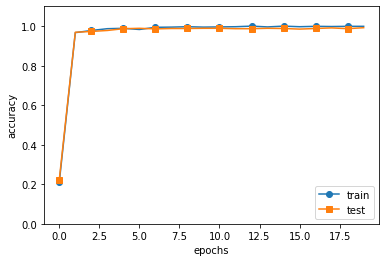

In [8]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

In [11]:
network.save_params('CNNparams.pkl')

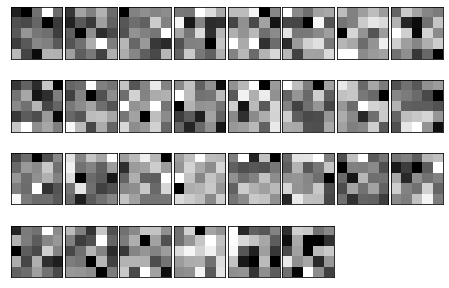

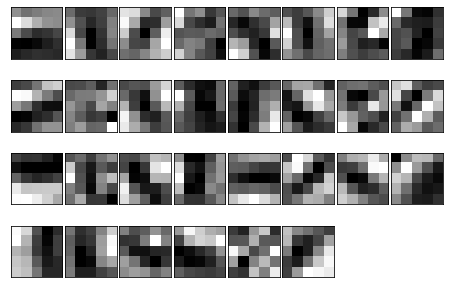

In [13]:
def filter_show(filters, nx=8, margin=3, scale=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
filter_show(network.params['W1'])

network.load_params("CNNparams.pkl")
filter_show(network.params['W1'])